## Batch Gradient Descent

    not scalable but provide better results

## Stochastic Gradient Descent

    random algorithms, needs to run more time, Good Fit solution will be there, Highly Scalble

## Mini Batch Gradient Descent

    better than stochastic, Scalable, Reasonable fit you will get 

    

In [1]:
from sklearn.linear_model import SGDRegressor

In [2]:
model = SGDRegressor()

In [5]:
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [6]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

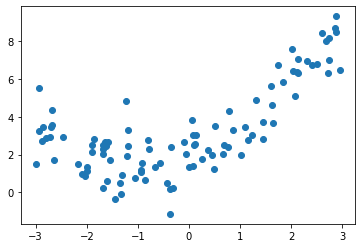

In [8]:
plt.scatter(X, y)
plt.show()

In [9]:
from sklearn.linear_model import SGDRegressor

In [10]:
sgd_model = SGDRegressor()

In [11]:
sgd_model.fit(X, y)

SGDRegressor()

In [12]:
y_pred = sgd_model.predict(X)

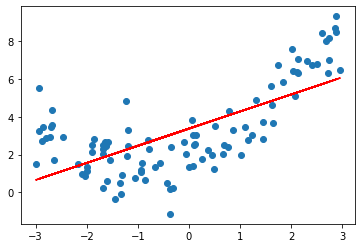

In [13]:
plt.scatter(X, y, label='actual')
plt.plot(X, y_pred, color='r', label='prediction')
plt.show()

In [18]:
X_new = np.c_[ X, X**2] # poly features add

In [24]:
(-0.37) ** 2

0.1369

In [22]:
np.round(X_new, 2)[:5]

array([[-0.86,  0.75],
       [-0.37,  0.14],
       [-0.94,  0.89],
       [ 0.77,  0.59],
       [ 2.73,  7.46]])

In [25]:
sgd_model = SGDRegressor()

In [26]:
sgd_model.fit(X_new, y)

SGDRegressor()

In [27]:
y_pred = sgd_model.predict(X_new)

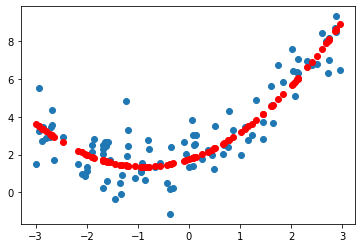

In [40]:
plt.scatter(X, y, label='actual')
plt.scatter(X, y_pred, c='r', label='predict')
plt.show()

#### how to choose how many degree of polynomial we should use

    
    higher degree of freedom and your model will overfit data
    
    less degree of freedom and your model will underfit data
    
    so choose no degree wisely

In [41]:
14 * 13 * 11

2002

In [42]:
from sklearn.preprocessing import PolynomialFeatures

In [43]:
poly_feature = PolynomialFeatures(degree=2)

In [44]:
X_new = poly_feature.fit_transform(X)

In [45]:
X[:5]

array([[-0.86446622],
       [-0.37439954],
       [-0.94273855],
       [ 0.76562437],
       [ 2.73200249]])

In [46]:
X_new[:5] # c + bx + ax^2

array([[ 1.        , -0.86446622,  0.74730184],
       [ 1.        , -0.37439954,  0.14017502],
       [ 1.        , -0.94273855,  0.88875598],
       [ 1.        ,  0.76562437,  0.58618068],
       [ 1.        ,  2.73200249,  7.46383759]])

In [47]:
poly_feature = PolynomialFeatures(degree=2, include_bias=False)

In [48]:
X_new = poly_feature.fit_transform(X)

In [50]:
X_new[:5]

array([[-0.86446622,  0.74730184],
       [-0.37439954,  0.14017502],
       [-0.94273855,  0.88875598],
       [ 0.76562437,  0.58618068],
       [ 2.73200249,  7.46383759]])

In [51]:
a = np.random.random(100).reshape(-1, 5)

In [53]:
poly = PolynomialFeatures(degree=5, include_bias=False)

In [54]:
a.shape

(20, 5)

$ \text {new_featues} = \frac { \text {(n+d)!} } {\text {n!d!}}$

In [55]:
b = poly.fit_transform(a)

In [56]:
b.shape

(20, 251)

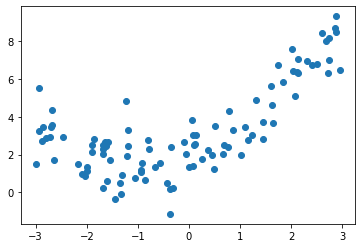

In [60]:
plt.scatter(X, y)
plt.show()

In [78]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score

In [64]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

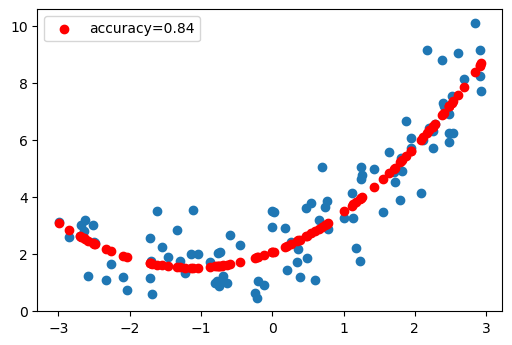

In [82]:
model = Pipeline([ # model.fit, model.predict
    ('imputer', SimpleImputer(strategy='median')), # transformer # .fit, .transform
    ('poly', PolynomialFeatures(degree=2, include_bias=False)), # transformer .fit, .transform
    ('scale', StandardScaler()), # transformer .fit, .transform
    ('sgd', SGDRegressor()) # estimator .fit, .predict
])
model.fit(X, y)

y_pred = model.predict(X)
plt.figure(dpi=100)
plt.scatter(X, y)
plt.scatter(X, y_pred, color='red', label=f'accuracy={r2_score(y, y_pred):.2f}')
plt.legend()
plt.show()

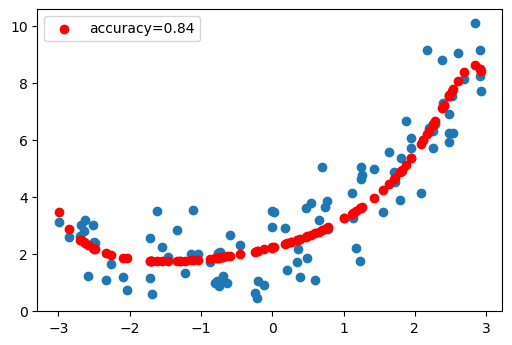

In [87]:
model = Pipeline([ # model.fit, model.predict
    ('imputer', SimpleImputer(strategy='median')), # transformer # .fit, .transform
    ('poly', PolynomialFeatures(degree=17, include_bias=False)), # transformer .fit, .transform
    ('scale', StandardScaler()), # transformer .fit, .transform
    ('sgd', SGDRegressor()) # estimator .fit, .predict
])
model.fit(X, y)

y_pred = model.predict(X)
plt.figure(dpi=100)
plt.scatter(X, y)
plt.scatter(X, y_pred, color='red', label=f'accuracy={r2_score(y, y_pred):.2f}')
plt.legend()
plt.show()

In [88]:
from sklearn.model_selection import train_test_split


    1, 2, 3, 4, 5, 6,......, m

In [ ]:
[:1]
[:2]
[:3]
[:100]
[:1000]

In [103]:
from sklearn.metrics import mean_squared_error as mse
def rmse(y, y_hat):
    return np.sqrt(mse(y, y_hat))

In [111]:
def plot_learning_curve(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
    train_error = []
    val_error = []
    for i in range(1, len(X)):
        model.fit(X_train[:i], y_train[:i])
        train_error.append(mse(y_train[:i], model.predict(X_train[:i])))
        val_error.append(mse(y_test[:i], model.predict(X_test[:i])))
    plt.figure(dpi=200)
    plt.plot(range(len(X)-1), train_error, 'b:', label='Training Error' )
    plt.plot(range(len(X)-1), val_error, 'r:', label='Test Error' )
    plt.xlabel("Size of DataSet")
    plt.ylabel("MSE Error")
    plt.legend()
    plt.show()
    

In [112]:
from sklearn.linear_model import LinearRegression

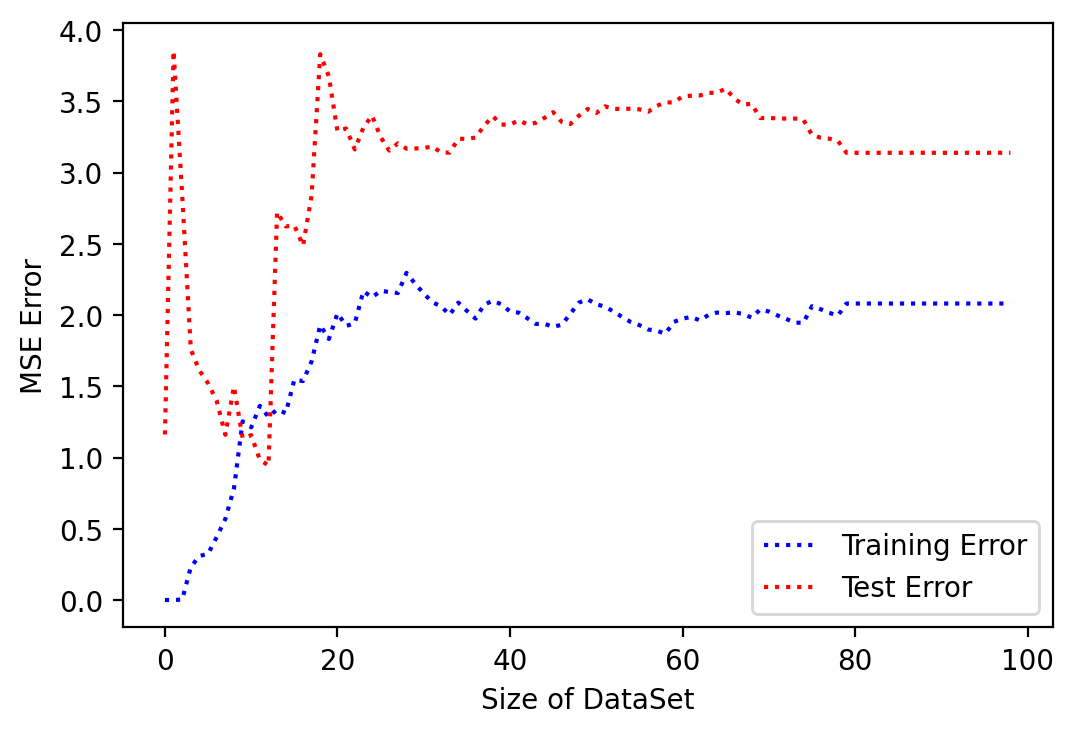

In [113]:
plot_learning_curve(LinearRegression(), X, y)

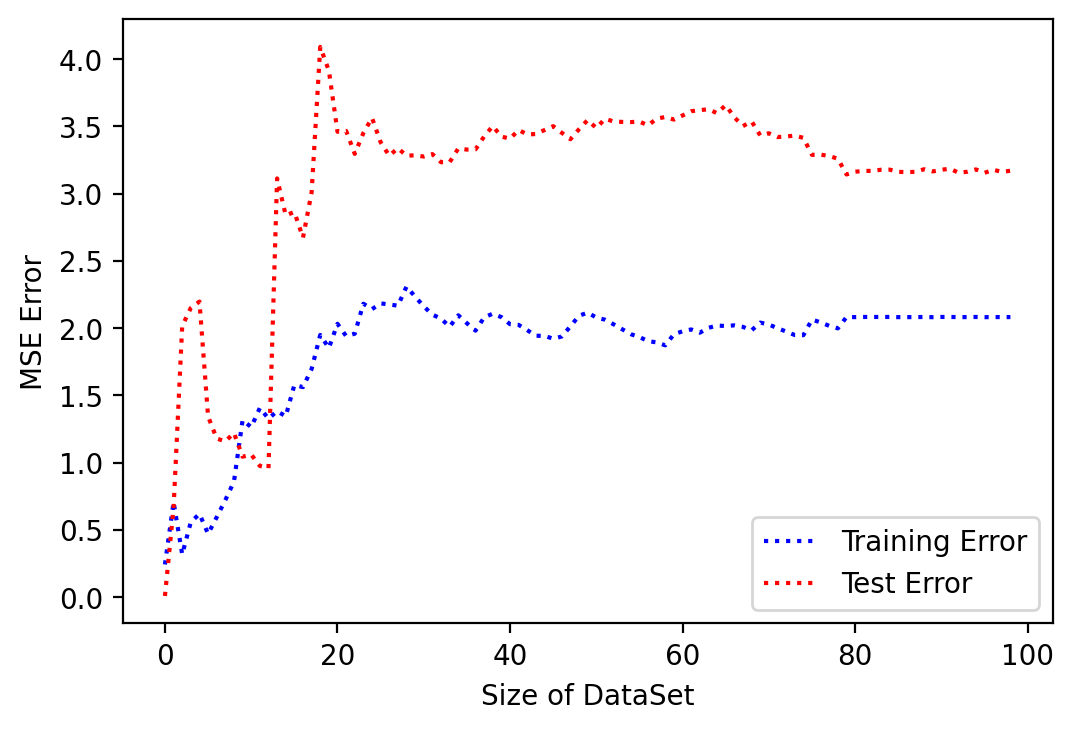

In [114]:
plot_learning_curve(SGDRegressor(), X, y)

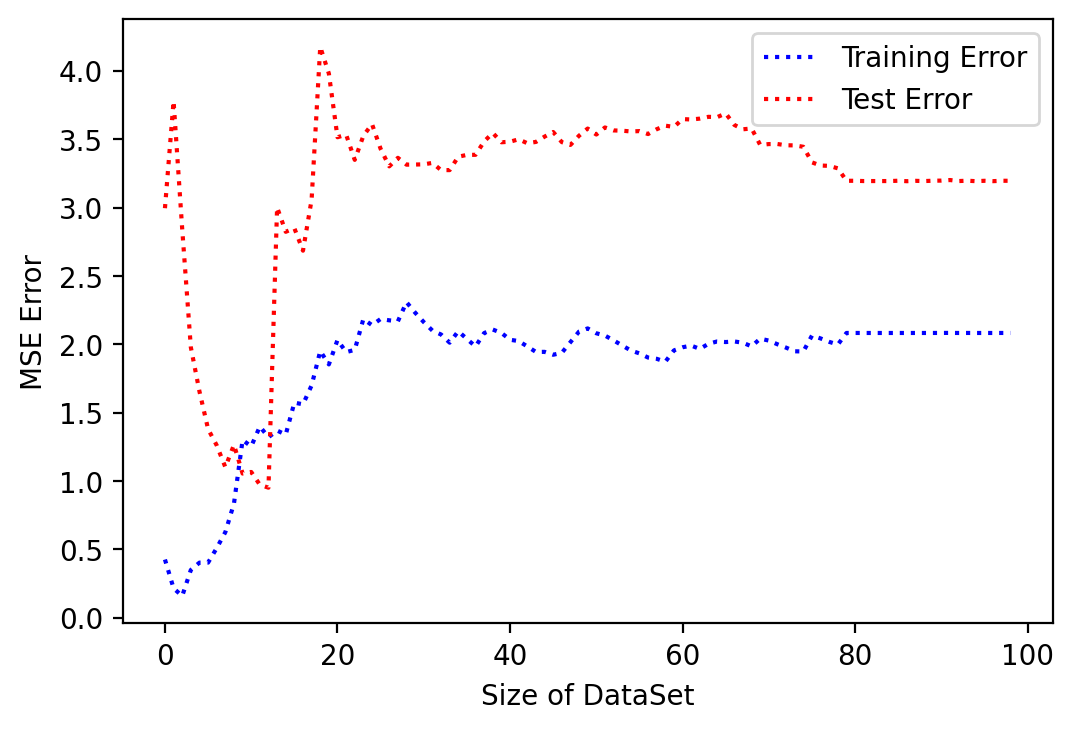

In [120]:
model = Pipeline([ # model.fit, model.predict
    ('imputer', SimpleImputer(strategy='median')), # transformer # .fit, .transform
    ('poly', PolynomialFeatures(degree=1, include_bias=False)), # transformer .fit, .transform
    ('scale', StandardScaler()), # transformer .fit, .transform
    ('sgd', SGDRegressor()) # estimator .fit, .predict
])
plot_learning_curve(model, X, y)

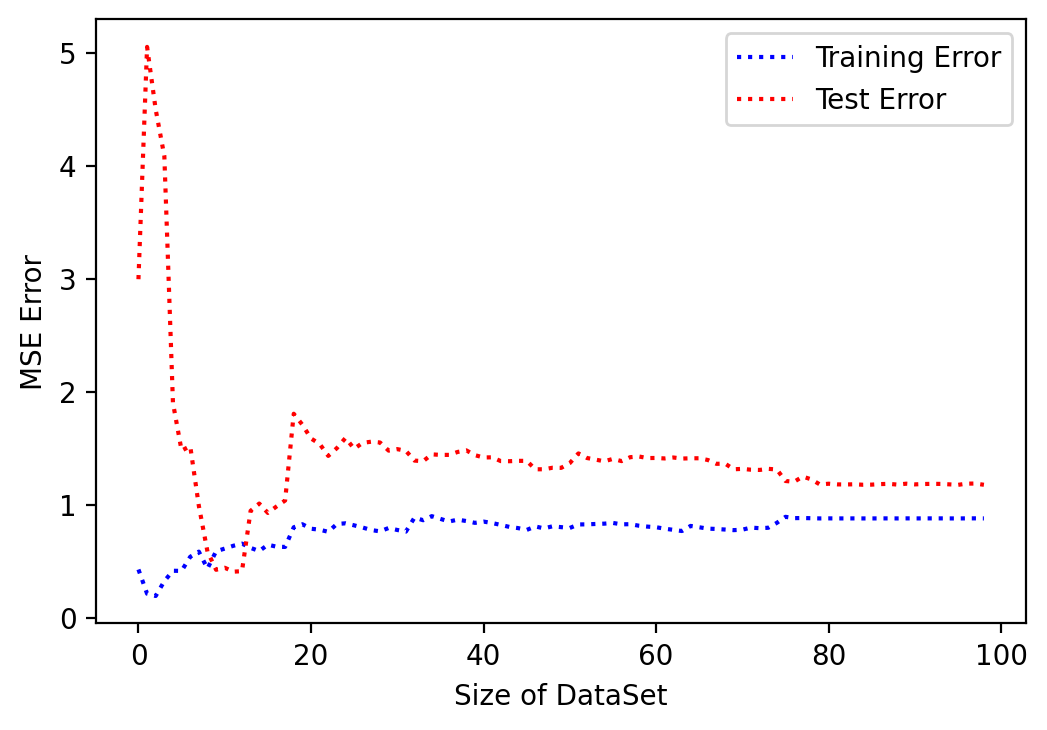

In [121]:
model = Pipeline([ # model.fit, model.predict
    ('imputer', SimpleImputer(strategy='median')), # transformer # .fit, .transform
    ('poly', PolynomialFeatures(degree=2, include_bias=False)), # transformer .fit, .transform
    ('scale', StandardScaler()), # transformer .fit, .transform
    ('sgd', SGDRegressor()) # estimator .fit, .predict
])
plot_learning_curve(model, X, y)

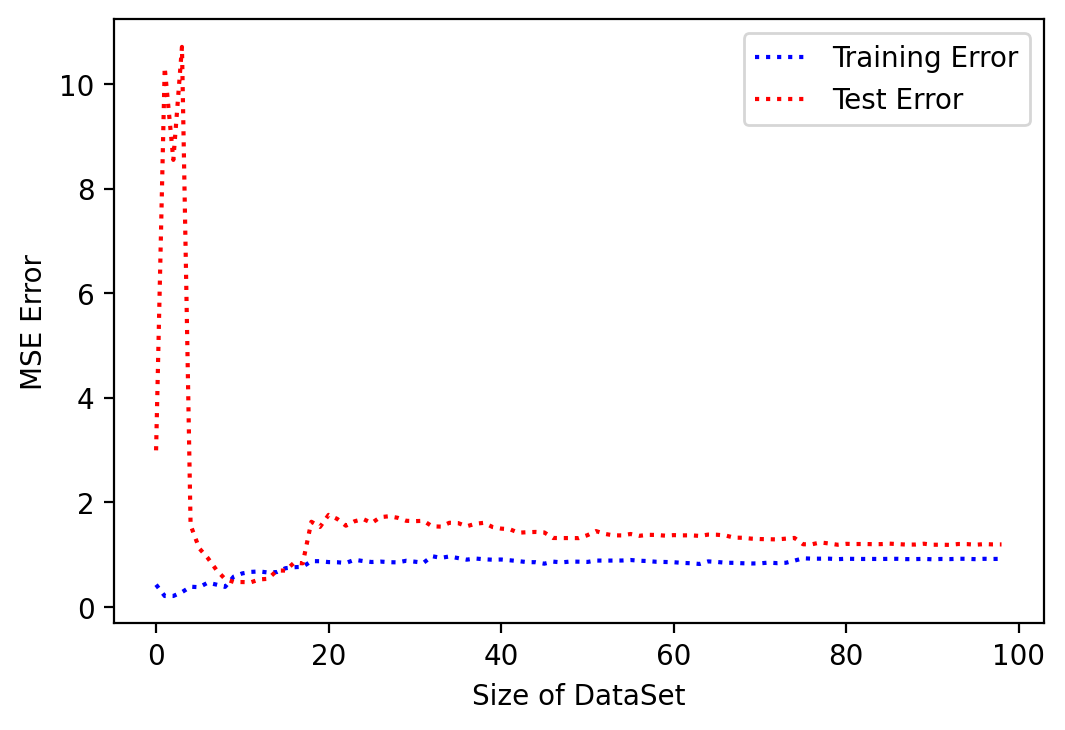

In [124]:
model = Pipeline([ # model.fit, model.predict
    ('imputer', SimpleImputer(strategy='median')), # transformer # .fit, .transform
    ('poly', PolynomialFeatures(degree=5, include_bias=False)), # transformer .fit, .transform
    ('scale', StandardScaler()), # transformer .fit, .transform
    ('sgd', SGDRegressor()) # estimator .fit, .predict
])
plot_learning_curve(model, X, y)

### Regularization Techniques 